Subset image using `Crop` and `CropNative`

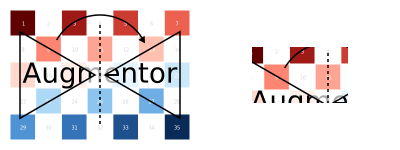

In [1]:
using Augmentor
using ImageShow, ImageCore
using OffsetArrays

img_in = testpattern(RGB, ratio=0.5)
img_out = augment(img_in, Crop(20:75,25:120))

mosaicview(img_in, img_out; fillvalue=colorant"white", nrow=1)

If the input image is plain arrays without offset indices, then `Crop` and `CropNative` is equivalent.

In [2]:
augment(img_in, Crop(20:75,25:120)) == augment(img_in, CropNative(20:75,25:120))

true

Whether you should use `Crop` or `CropNative` depends on if you want to take the index offset
of the input image into consideration.

In [3]:
imgo_in = OffsetArray(img_in, -50, -50)
imgo_out = augment(imgo_in, Crop(20:75,25:120))
imgo_out_native = augment(imgo_in, CropNative(20:75,25:120))

(
    imgo_in[(first.(axes(imgo_in)) .+ (20, 25))...] == imgo_out[1, 1],
    imgo_in[20, 25] == imgo_out_native[1, 1]
)

(true, true)

A typical scenario that you may want to use `CropNative` is when you have affine operations, e.g.,
`Rotate` and `ShearX`.

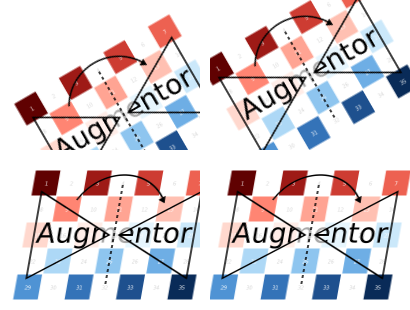

In [4]:
mosaicview(
    augment(img_in, Rotate(30) |> Crop(axes(img_in))),
    augment(img_in, Rotate(30) |> CropNative(axes(img_in))),

    augment(img_in, ShearX(10) |> Crop(axes(img_in))),
    augment(img_in, ShearX(10) |> CropNative(axes(img_in)));

    fillvalue=colorant"white", rowmajor=true, nrow=2, npad=10
)

## Reference

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*